# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
df_college = pd.read_csv('./college_completion.csv', low_memory=False)
print("df_college Dimensions:")
print(df_college.shape, '\n')

print("df_college Variables:")
print(df_college.dtypes, '\n')

df_college.head()

df_college Dimensions:
(3798, 63) 

df_college Variables:
index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 



,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [3]:
df_narrow = df_college[['level', 'aid_value', 'control', 'grad_100_value']]
df_narrow.head()

,level,aid_value,control,grad_100_value
0,4-year,7142.0,Public,10.0
1,4-year,6088.0,Public,29.4
2,4-year,2540.0,Private not-for-profit,0.0
3,4-year,6647.0,Public,16.5
4,4-year,7256.0,Public,8.8


The dimensions of the data are3,798 observations and 63 variables. The variables are a mixture of categorical and numerical with some containing multiple NaN values.

In [4]:
pd.crosstab(df_narrow['control'], df_narrow['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


There are more public 2-year institutions than there are public 4-year. Private not-for-profit colleges are much more likely to be 4-year than 2-year colleges. Private for-profit are almost equally likely to be 2 or 4 years long in their program length.

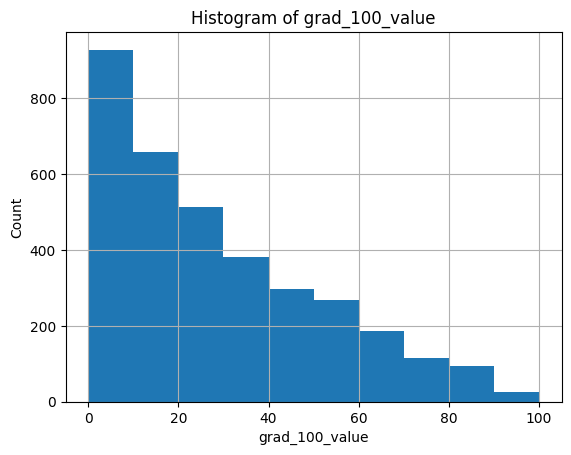

In [14]:
var = 'grad_100_value'
df_narrow[var].hist()
plt.title('Histogram of grad_100_value')
plt.xlabel('grad_100_value')
plt.ylabel('Count')
plt.show()

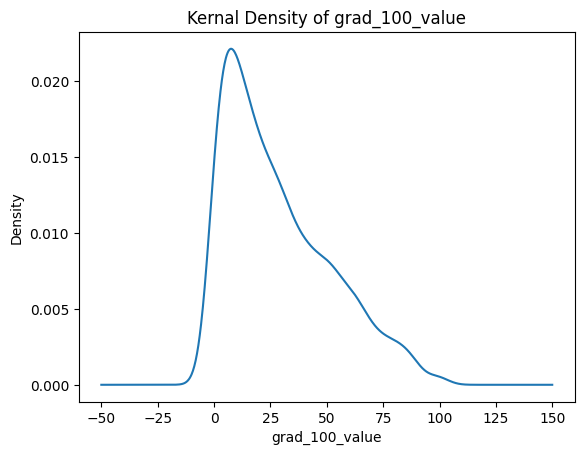

In [13]:
df_narrow[var].plot.kde()
plt.title('Kernal Density of grad_100_value')
plt.xlabel('grad_100_value')
plt.show()

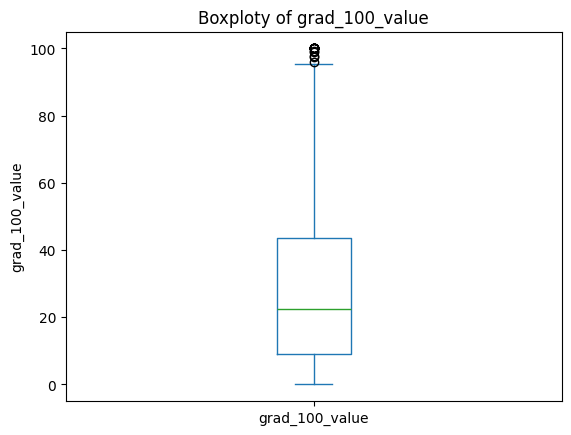

In [16]:
df_narrow[var].plot.box()
plt.title('Boxploty of grad_100_value')
plt.ylabel('grad_100_value')
plt.show()

In [17]:
df_narrow[var].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


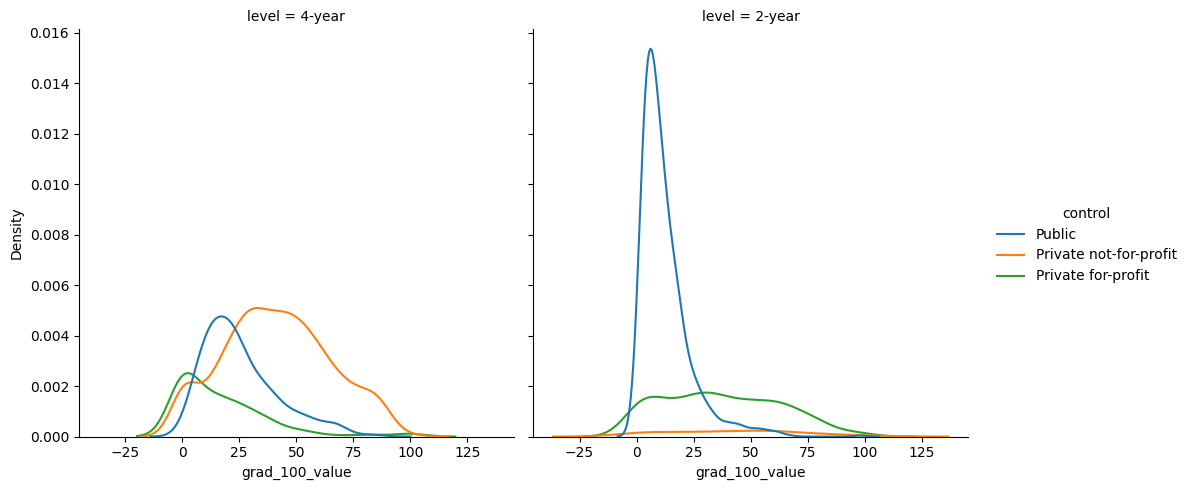

In [28]:
import seaborn as sns

fig = sns.displot(data=df_narrow, x='grad_100_value', hue='control', col='level', kind='kde')



In [21]:
gdf = (df_narrow.loc[:,['grad_100_value','control','level'] ]).groupby(['control','level'])
gdf.describe()


grad_100_value                             \
                                       count       mean        std  min   
control                level                                              
Private for-profit     2-year          461.0  37.197614  25.497380  0.0   
                       4-year          318.0  17.382704  20.788525  0.0   
Private not-for-profit 2-year           68.0  41.913235  28.348302  0.0   
                       4-year         1121.0  41.645674  23.243453  0.0   
Public                 2-year          926.0  12.400000  10.893600  0.0   
                       4-year          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
control                level                                
Private for-profit     2-year  15.800  33.9  57.800  100.0  
                       4-year   0.000  12.5  26.325  100.0  
Private not-for-profit 2-year  16.225  44.4  61.200  100.0  
                       4-year  25.000  41.0  57.800  100.0  
Public                 2-year   5.100   9.4  16.175   97.8  
                       4-year  13.600  21.8  33.800   86.3

/tmp/ipython-input-418902550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_narrow['levelXcontrol']=df_narrow['level']+', '+df_narrow['control']


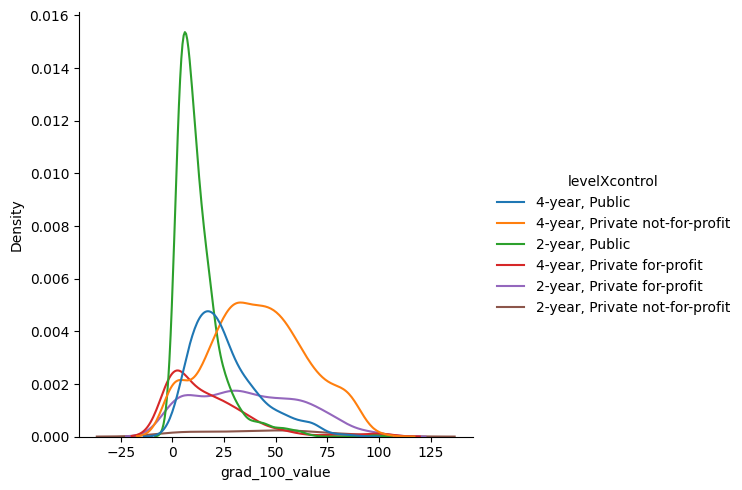

In [31]:
df_narrow['levelXcontrol']=df_narrow['level']+', '+df_narrow['control']
fig_2 = sns.displot(data=df_narrow, x='grad_100_value', hue='levelXcontrol', kind='kde')